In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import norm, kurtosis

In [2]:
def addfeatures( df1, window, direction = 0 ):
    suffix = 'back'
    if ( direction == 1):
        suffix = 'front'
    df1["rolling_" + suffix] = df1['signal'].rolling(window=window).mean()
    df1['signal_diff_' + suffix ]=df1['signal']-df1["rolling_" + suffix]
    df1["rolling_std_"  + suffix] = df1['signal'].rolling(window=window).std()

def prepare( df, sampling, window = 1 ):    
    addfeatures( df, int(window/sampling), direction = -1 )    
    df = df[::-1].copy()
    addfeatures( df, int(window/sampling), direction = 1 )
    df = df[::-1].copy()
    df = df.dropna()    
    df = df.set_index(['time'])
    df['rolling_diff']=df['rolling_front']-df['rolling_back']
    return df

In [3]:
trainraw = pd.read_csv('train.csv')
testraw = pd.read_csv('test.csv')


sampling = 0.0001;
batchsize = 50
n = int(batchsize/sampling);
totalbatches = int(len(trainraw)//n)

train = prepare( trainraw, sampling, window = 1  )
test = prepare( testraw, sampling, window = 1  )

batches = []
for i in range(0,totalbatches):
    batches.append( train[i*batchsize:(i+1)*(batchsize)] )

In [4]:
train.head()

,signal,open_channels,rolling_back,signal_diff_back,rolling_std_back,rolling_front,signal_diff_front,rolling_std_front,rolling_diff
time,,,,,,,,,
1.0000,-2.7107,0,-2.696776,-0.013924,0.243936,-2.665842,-0.044858,0.310378,0.030934
1.0001,-2.9971,0,-2.696800,-0.300300,0.243953,-2.665834,-0.331266,0.310378,0.030966
1.0002,-2.7052,0,-2.696785,-0.008415,0.243948,-2.665852,-0.039348,0.310403,0.030932
1.0003,-2.7499,0,-2.696819,-0.053081,0.243932,-2.665879,-0.084021,0.310418,0.030939
1.0004,-2.9634,0,-2.696801,-0.266599,0.243906,-2.665881,-0.297519,0.310419,0.030921


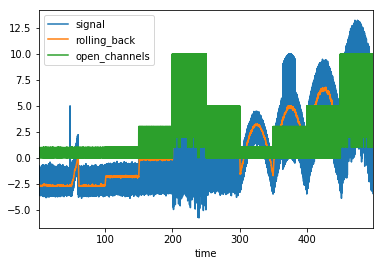

In [6]:
train[['signal','rolling_back','open_channels']].plot()

C:\Users\Andre\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Andre\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Andre\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Andre\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Andre\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

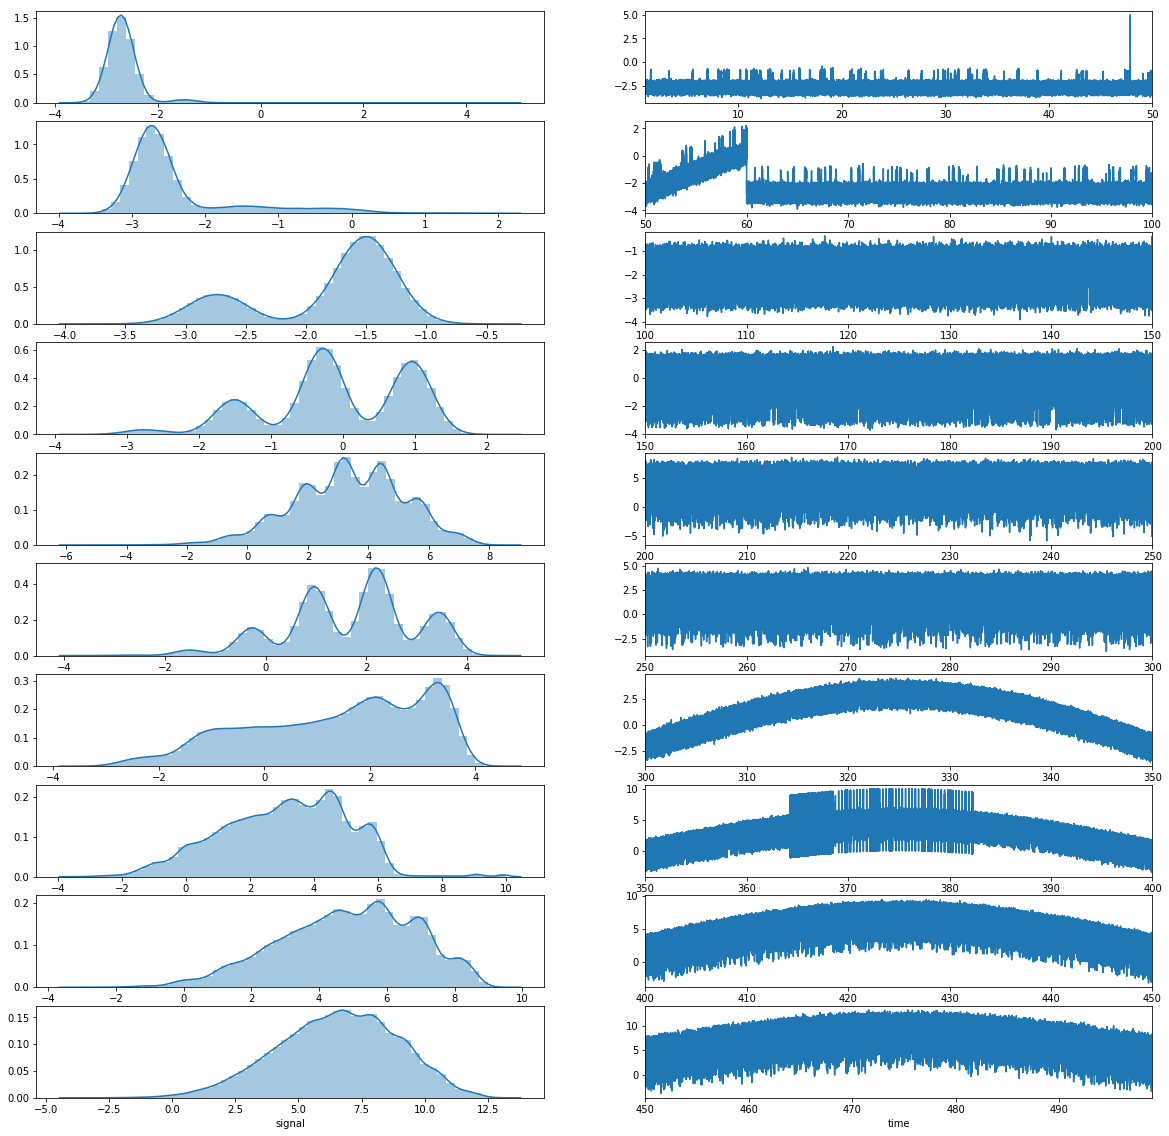

In [29]:
fig = plt.figure(figsize = (20,20))
fig.subplots_adjust()
l = len(batches)
i = 1

for batch in batches:
    ax = fig.add_subplot(l, 2, i)
    i+=1
    sns.distplot(batch['signal'],ax=ax)
    ax = fig.add_subplot(l, 2, i)
    i+=1
    batch['signal'].plot(ax=ax)
plt.show()

C:\Users\Andre\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Andre\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Andre\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Andre\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Andre\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

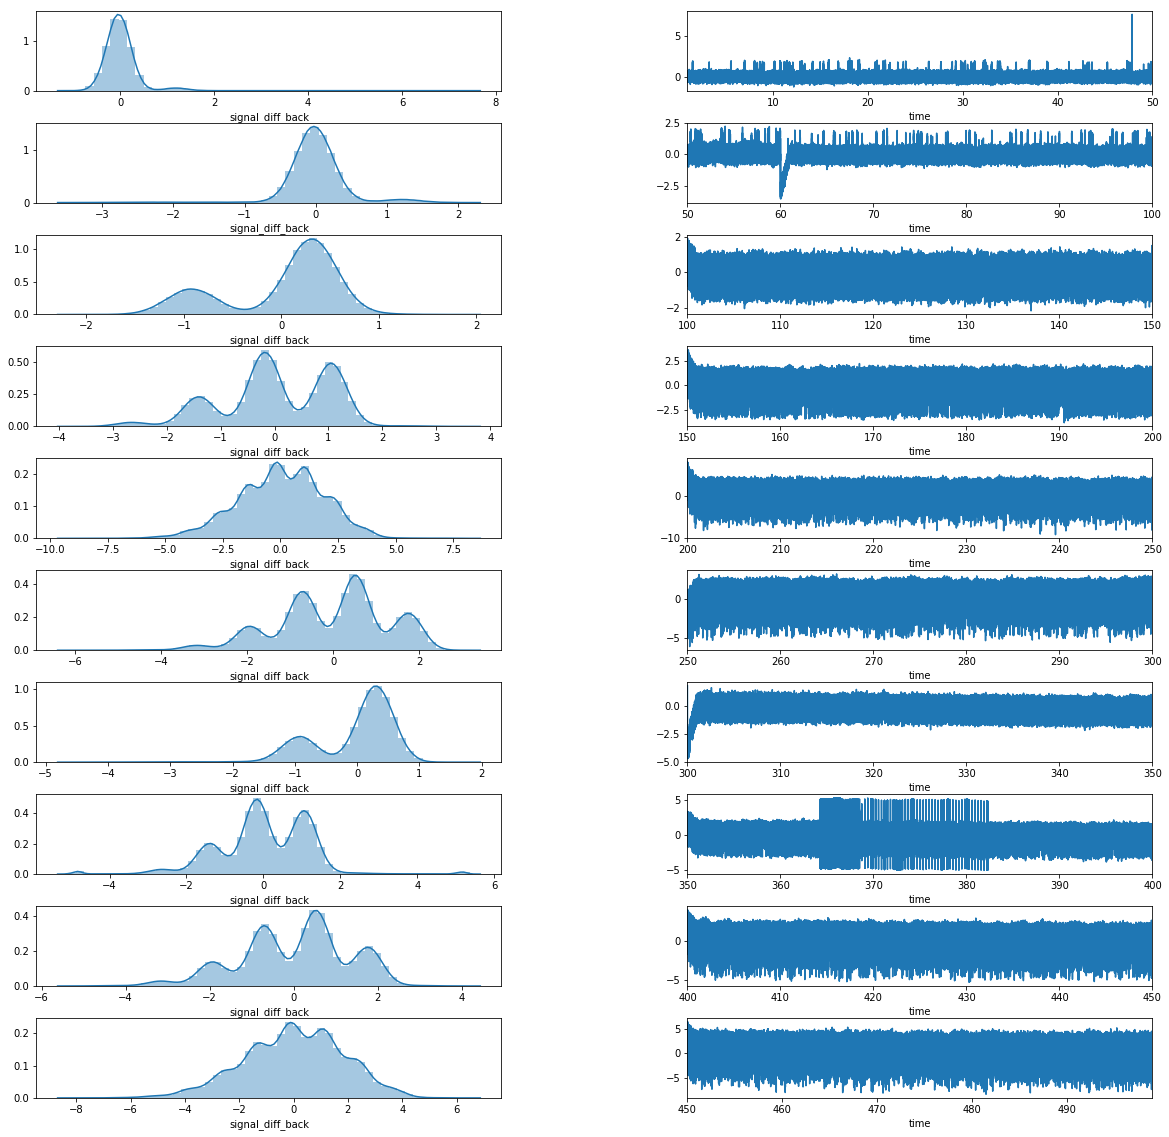

In [51]:
fig = plt.figure(figsize = (20,20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
l = len(batches)
i = 1

for batch in batches:
    ax = fig.add_subplot(l, 2, i)
    i+=1
    sns.distplot(batch['signal_diff_back'],ax=ax)
    ax = fig.add_subplot(l, 2, i)
    i+=1
    batch['signal_diff_back'].plot(ax=ax)
plt.show()

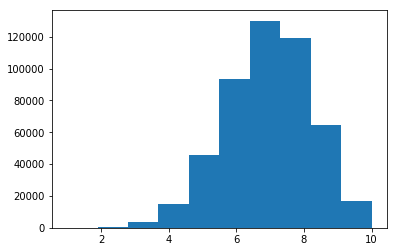

C:\Users\Andre\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Andre\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Andre\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Andre\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Andre\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

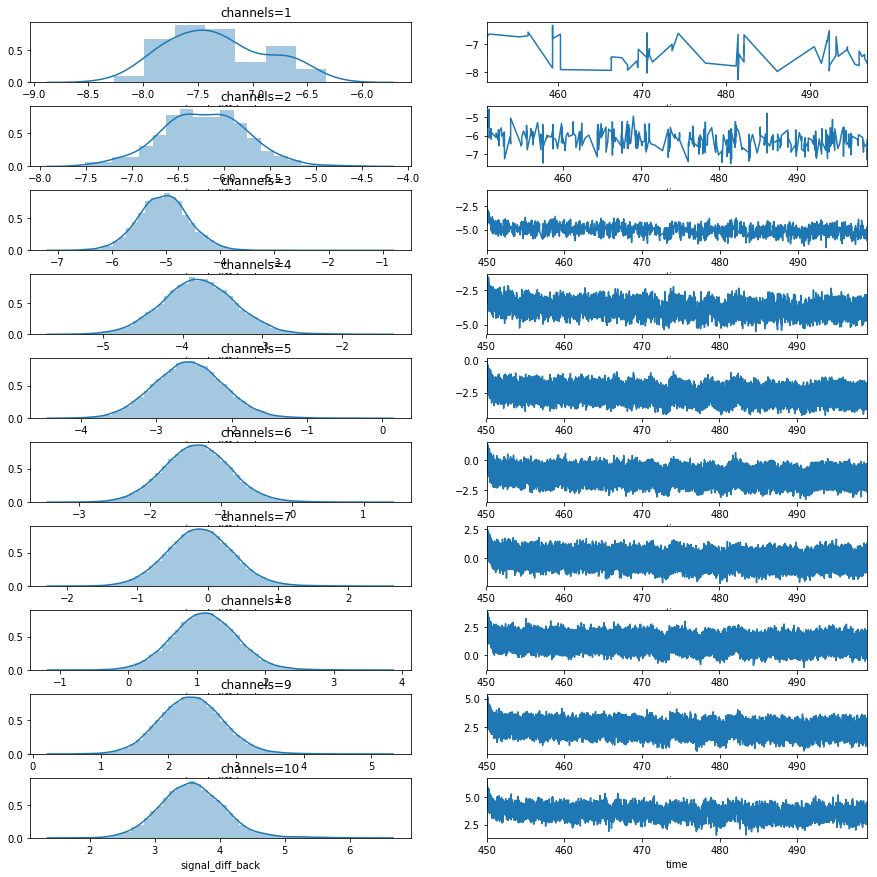

In [66]:
batchid=9
batch = batches[batchid]


channels = sorted(batch['open_channels'].unique())
l = len(channels)
i = 1

plt.hist(batch['open_channels'])
plt.show()

fig = plt.figure(figsize = (15,15))
fig.subplots_adjust(hspace=0.4)
for channel in channels:
    dfsig = batch[batch['open_channels']==channel]
    ax = fig.add_subplot(l, 2, i)
    ax.set_title('channels='+ str(channel),{'horizontalalignment': 'left'})
    i+=1
    sns.distplot(dfsig['signal_diff_back'],ax=ax)
    ax = fig.add_subplot(l, 2, i)
    i+=1
    dfsig['signal_diff_back'].plot(ax=ax)
    
plt.show()